# Projeto de Machine Learning de Regressão
## Grupo: Jean Ricken, Lucas Orestes Fabris

In [63]:
import pandas as pd
import numpy as np
dado_inteiro = pd.read_pickle('dados_projeto_ml_regresao_.pkl')

# Abrindo DADOS


In [66]:
dados = dado_inteiro.head(len(dados) // 2)
dados = dados.drop(columns = ['bhk_or_rk','posted_by'])
dados

,under_construction,rera,bhk_no,square_ft,ready_to_move,resale,longitude,latitude,price
0,0,0,2,1300.236407,1,1,12.969910,77.597960,71500.0
1,0,0,2,1275.000000,1,1,12.274538,76.644605,66300.0
2,0,0,2,933.159722,1,1,12.778033,77.632191,55900.0
3,0,1,2,929.921143,1,1,28.642300,77.344500,81250.0
4,1,0,2,999.009247,0,1,22.592200,88.484911,78650.0
...,...,...,...,...,...,...,...,...,...
7357,1,1,2,1160.182535,0,1,19.164900,72.960800,195000.0
7358,0,1,2,965.250965,1,1,12.973237,77.646859,45500.0
7359,0,0,3,1756.234633,1,1,28.594200,77.367500,130000.0
7360,0,0,2,986.842105,1,1,19.083330,74.733330,58500.0


In [67]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7362 entries, 0 to 7361
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   under_construction  7362 non-null   int64  
 1   rera                7362 non-null   int64  
 2   bhk_no              7362 non-null   int64  
 3   square_ft           7362 non-null   float64
 4   ready_to_move       7362 non-null   int64  
 5   resale              7362 non-null   int64  
 6   longitude           7362 non-null   float64
 7   latitude            7362 non-null   float64
 8   price               7362 non-null   float64
dtypes: float64(4), int64(5)
memory usage: 517.8 KB


### Separando x e y

In [68]:
xx = dados.iloc[:,:8].values
yy = dados.iloc[:,8].values

In [69]:
from sklearn.preprocessing import MinMaxScaler
escalonador = MinMaxScaler()
xxt = escalonador.fit_transform(xx)

## Separando dados de treino e teste

In [70]:
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(xx,yy,test_size=.15,random_state=0)

## Cross Validation

In [71]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
crossvalidation = cross_val_score(modelo, x_treino, y_treino, cv=5, verbose=2)

crossvalidation

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.7s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.7s remaining:    0.0s


[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.5s
[CV] END .................................................... total time=   2.5s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.2s finished


array([0.93427051, 0.80904682, 0.67478542, 0.9293871 , 0.96044358])

### Acompanhando multiplos scores

In [72]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer
scoring = {
    'mean_absolute_error': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R2': 'r2'
}
crossvalidation = cross_validate(modelo,x_treino,y_treino,cv=5,verbose=2,scoring=scoring)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   2.6s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.6s
[CV] END .................................................... total time=   2.8s
[CV] END .................................................... total time=   2.8s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.8s finished


In [73]:
crossvalidation

{'fit_time': array([2.70653176, 2.61785555, 2.68537974, 2.8871839 , 2.82078099]),
 'score_time': array([0.03469133, 0.03372836, 0.03520155, 0.04166389, 0.0376668 ]),
 'test_mean_absolute_error': array([-47944.87467424, -56526.10949376, -63981.9726672 , -59388.30741845,
        -48078.19126908]),
 'test_MAPE': array([-0.38616596, -0.37098619, -0.49926686, -2.20212129, -0.37158964]),
 'test_R2': array([0.93773472, 0.81599199, 0.63696619, 0.92578502, 0.96187682])}

### Organizando um teste mais robusto

In [74]:
cv = 20
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_absolute_error, make_scorer
scoring = {
    'mean_absolute_error': 'neg_mean_absolute_error',
    'MAPE': 'neg_mean_absolute_percentage_error',
    'R2': 'r2'
}
crossvalidation = cross_validate(modelo,x_treino,y_treino,cv=cv,verbose=2,scoring=scoring)
teste_nome = [f'teste_{x}' for x in range(1,cv+1)]
resultados = pd.DataFrame()
resultados['teste'] = teste_nome
resultados['test_R2'] = crossvalidation['test_R2']
resultados['test_MAPE'] = -crossvalidation['test_MAPE'] 
resultados['test_mean_absolute_error'] = -crossvalidation['test_mean_absolute_error'] 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   3.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s


[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   2.9s
[CV] END .................................................... total time=   3.2s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.0s
[CV] END .................................................... total time=   3.1s
[CV] END .................................................... total time=   3.0s
[CV] END ...................

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  1.0min finished


In [75]:
resultados

,teste,test_R2,test_MAPE,test_mean_absolute_error
0,teste_1,0.956556,0.341648,48673.011065
1,teste_2,0.882827,0.342356,58658.100431
2,teste_3,0.983049,0.376134,42063.078525
3,teste_4,0.681165,0.373471,39238.180688
4,teste_5,0.771785,0.343967,72243.279447
5,teste_6,0.463897,0.376836,70753.923988
6,teste_7,0.573289,0.386643,46725.771938
7,teste_8,0.974056,0.331817,39148.929112
8,teste_9,0.576539,0.915354,88820.494345
9,teste_10,0.978101,0.334671,40995.805113


In [76]:
import matplotlib.pyplot as plt

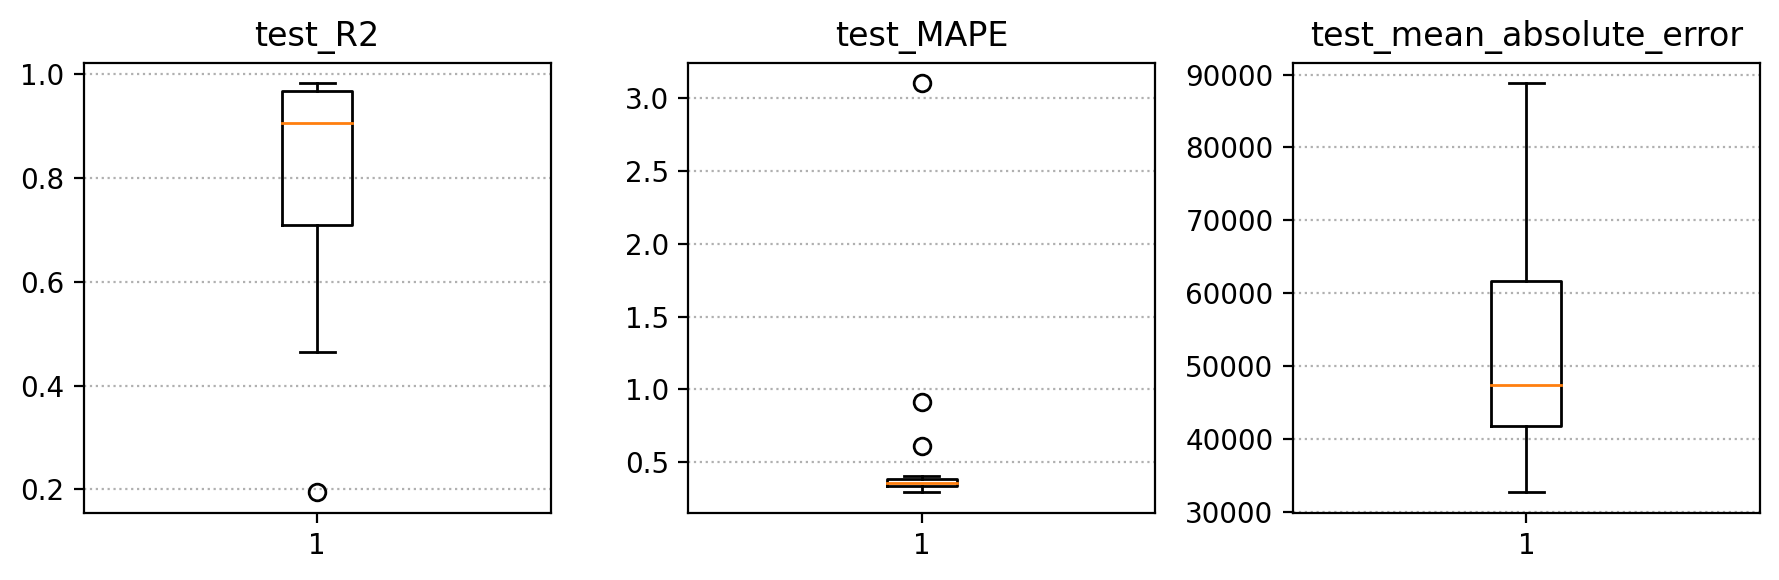

In [77]:
fig,ax = plt.subplots(1,3,figsize = (9,3),dpi = 200)
ax[0].boxplot(resultados.test_R2)
ax[0].set_title('test_R2')
ax[0].grid(ls = ':',axis = 'y')
ax[1].boxplot(resultados.test_MAPE)
ax[1].set_title('test_MAPE')
ax[1].grid(ls = ':',axis = 'y')
ax[2].boxplot(resultados.test_mean_absolute_error)
ax[2].set_title('test_mean_absolute_error')
ax[2].grid(ls = ':',axis = 'y')

# plt.subplots_adjust(wspace=0.4)
plt.tight_layout()

### Testando o modelo

In [78]:
modelo.fit(x_treino,y_treino)
y_previsto = modelo.predict(x_teste)
from sklearn.metrics import r2_score,mean_absolute_percentage_error,mean_absolute_error
print(r2_score(y_teste,y_previsto))
print(mean_absolute_percentage_error(y_teste,y_previsto)*100)
print(mean_absolute_error(y_teste,y_previsto))

0.9415579899740435
38.55412468539282
51361.20303081232


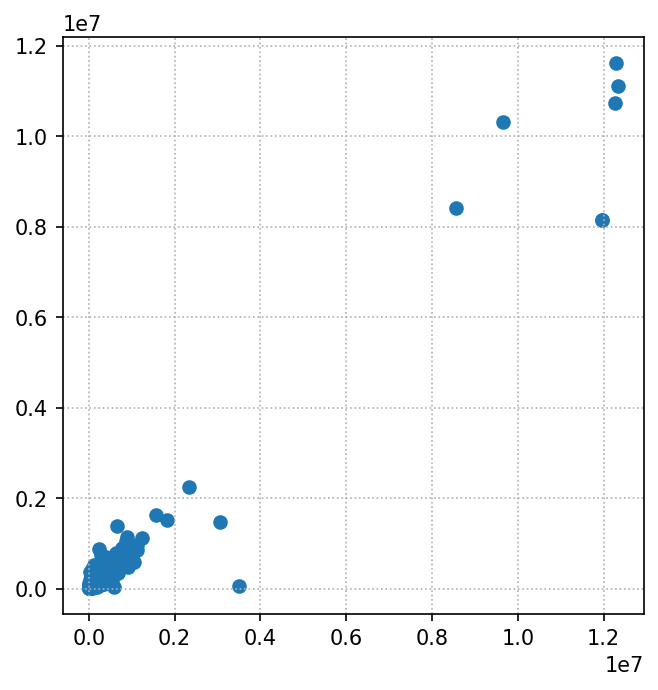

In [79]:
plt.figure(figsize=(5,5),dpi=150)
plt.scatter(y_teste,y_previsto)
plt.grid(ls=':')

## CrossValidation com otimização de hiperparâmetros

In [80]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
modelo = RandomForestRegressor()
grid_parametros = {
    'n_estimators':[100,200],
    'criterion':['squared_error', 'absolute_error'],
    'max_depth':[5,10,20]
}
grid = GridSearchCV(modelo,grid_parametros,cv=5,verbose=2)


In [81]:
grid.fit(x_treino,y_treino)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.4s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.6s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.4s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.4s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.6s
[CV] END criterion=squared_error, max_depth=10, n_estimators=100; total time=   1.3s
[CV] END crite

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 10, 20], 'n_estimators': [100, 200]},
             verbose=2)

In [82]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.785664,0.025163,0.012800,0.000838,squared_error,5,100,"{'criterion': 'squared_error', 'max_depth': 5,...",0.933210,0.789079,0.670690,0.934678,0.953927,0.856317,0.110054,3
1,1.556917,0.066539,0.024911,0.003227,squared_error,5,200,"{'criterion': 'squared_error', 'max_depth': 5,...",0.930832,0.781871,0.679785,0.925810,0.950975,0.853855,0.105846,6
2,1.368742,0.019979,0.018650,0.000242,squared_error,10,100,"{'criterion': 'squared_error', 'max_depth': 10...",0.934179,0.797067,0.640312,0.940964,0.957532,0.854011,0.121337,5
3,2.821523,0.092525,0.040466,0.004415,squared_error,10,200,"{'criterion': 'squared_error', 'max_depth': 10...",0.935965,0.805947,0.649581,0.920444,0.963386,0.855065,0.115921,4
4,2.460507,0.089904,0.031149,0.000474,squared_error,20,100,"{'criterion': 'squared_error', 'max_depth': 20...",0.932776,0.803003,0.682235,0.925812,0.960129,0.860791,0.104403,1
5,5.427678,0.202430,0.070029,0.006699,squared_error,20,200,"{'criterion': 'squared_error', 'max_depth': 20...",0.936006,0.809063,0.645167,0.929377,0.963134,0.856549,0.118250,2
6,28.023319,1.217320,0.012692,0.000662,absolute_error,5,100,"{'criterion': 'absolute_error', 'max_depth': 5...",0.936341,0.780704,0.631816,0.898090,0.943304,0.838051,0.118461,11
7,61.631099,8.450179,0.029457,0.007843,absolute_error,5,200,"{'criterion': 'absolute_error', 'max_depth': 5...",0.934795,0.781724,0.575227,0.881126,0.944039,0.823382,0.136837,12
8,31.852649,0.648137,0.021445,0.002942,absolute_error,10,100,"{'criterion': 'absolute_error', 'max_depth': 1...",0.941683,0.811826,0.596927,0.901558,0.955056,0.841410,0.132087,10
9,66.760529,1.382585,0.050499,0.021174,absolute_error,10,200,"{'criterion': 'absolute_error', 'max_depth': 1...",0.940511,0.811885,0.621402,0.908681,0.955494,0.847595,0.123649,9


In [83]:
grid.best_params_

{'criterion': 'squared_error', 'max_depth': 20, 'n_estimators': 100}

In [84]:
grid.best_estimator_

RandomForestRegressor(max_depth=20)

In [85]:
grid = GridSearchCV(modelo,grid_parametros,cv=5,verbose=2,
                    scoring='neg_mean_absolute_percentage_error')

In [86]:
grid.fit(x_treino,y_treino)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.8s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=100; total time=   0.7s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=5, n_estimators=200; total time=   1.5s
[CV] END criterion=squared_error, max_depth=10, n_estimators=100; total time=   1.3s
[CV] END crite

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 10, 20], 'n_estimators': [100, 200]},
             scoring='neg_mean_absolute_percentage_error', verbose=2)

In [87]:
results = pd.DataFrame(grid.cv_results_)
results.sort_values(by='rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
11,74.576968,2.874103,0.065385,0.005604,absolute_error,20,200,"{'criterion': 'absolute_error', 'max_depth': 2...",-0.380074,-0.350289,-0.530803,-2.207954,-0.385761,-0.770976,0.721216,1
9,63.188399,0.349442,0.038474,0.000245,absolute_error,10,200,"{'criterion': 'absolute_error', 'max_depth': 1...",-0.347230,-0.327444,-0.508800,-2.519391,-0.348290,-0.810231,0.857080,2
5,5.771761,0.845059,0.088580,0.038008,squared_error,20,200,"{'criterion': 'squared_error', 'max_depth': 20...",-0.379896,-0.365310,-0.493960,-2.472039,-0.372615,-0.816764,0.828984,3
3,3.550604,0.923032,0.044939,0.009095,squared_error,10,200,"{'criterion': 'squared_error', 'max_depth': 10...",-0.429426,-0.415934,-0.563804,-2.244608,-0.432789,-0.817312,0.715662,4
8,31.663553,0.394056,0.019935,0.000383,absolute_error,10,100,"{'criterion': 'absolute_error', 'max_depth': 1...",-0.342892,-0.329011,-0.522120,-2.569139,-0.361202,-0.824873,0.874906,5
4,2.824769,0.323453,0.044838,0.014024,squared_error,20,100,"{'criterion': 'squared_error', 'max_depth': 20...",-0.378875,-0.368261,-0.509032,-2.620260,-0.369446,-0.849175,0.887135,6
10,37.540079,2.260436,0.032240,0.001895,absolute_error,20,100,"{'criterion': 'absolute_error', 'max_depth': 2...",-0.387625,-0.347632,-0.531102,-2.713458,-0.391543,-0.874272,0.921691,7
6,26.440583,0.461692,0.013287,0.000849,absolute_error,5,100,"{'criterion': 'absolute_error', 'max_depth': 5...",-0.424756,-0.391550,-0.609606,-2.545849,-0.417235,-0.877799,0.837630,8
7,53.656122,1.099784,0.025104,0.000674,absolute_error,5,200,"{'criterion': 'absolute_error', 'max_depth': 5...",-0.422322,-0.391167,-0.594510,-2.589655,-0.414891,-0.882509,0.856639,9
2,1.403172,0.027771,0.019358,0.000559,squared_error,10,100,"{'criterion': 'squared_error', 'max_depth': 10...",-0.427866,-0.416714,-0.561875,-2.668134,-0.430490,-0.901016,0.885160,10


In [88]:
grid.best_params_

{'criterion': 'absolute_error', 'max_depth': 20, 'n_estimators': 200}

In [89]:
grid.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=20,
                      n_estimators=200)

In [90]:
y_pred = grid.best_estimator_.predict(x_teste)

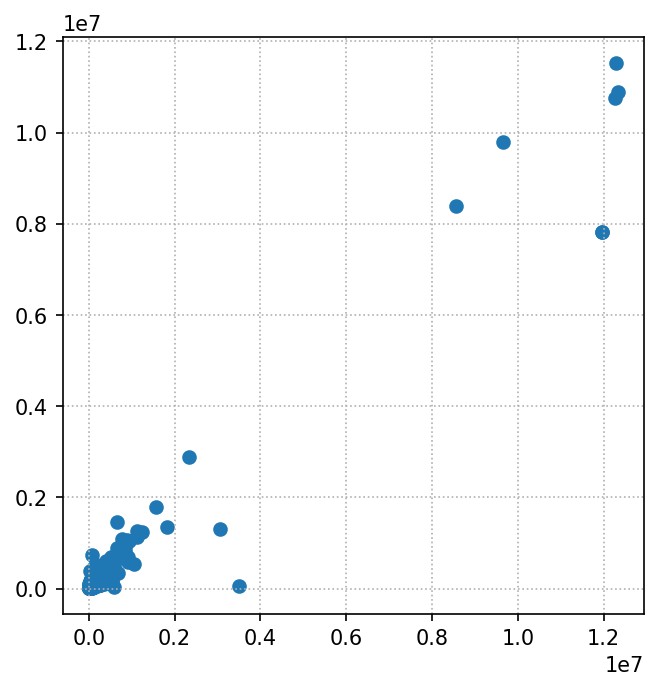

In [91]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5),dpi=150)
plt.scatter(y_teste,y_pred)
plt.grid(ls=':')

In [92]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error
print(r2_score(y_teste,y_pred))
print(mean_absolute_percentage_error(y_teste,y_pred)*100)
print(mean_absolute_error(y_teste,y_pred))

0.9355162896436696
38.78745507906019
51534.29223529412


In [ ]:
modelo = grid.best_estimator_
crossvalidation = cross_validate(modelo,xx,yy,cv=20,verbose=2,scoring=scoring)

In [ ]:
teste_nome = [f'teste_{x}' for x in range(1,cv+1)]
resultados = pd.DataFrame()
resultados['teste'] = teste_nome
resultados['test_R2'] = crossvalidation['test_R2']
resultados['test_MAPE'] = -crossvalidation['test_MAPE'] 
resultados['test_mean_absolute_error'] = -crossvalidation['test_mean_absolute_error'] 